<a href="https://colab.research.google.com/github/S-Devisri01/Python-colab/blob/main/Python_gen_ai_day_5_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Mango_ID        Date  Shop_ID  Customer_ID  Quantity  Actual_Price  \
0         1  2025-01-01        5         1396        14            81   
1         2  2025-01-02        9         1660        15            44   
2         3  2025-01-03        4         1637         9            90   
3         4  2025-01-04        2         1903        15            50   
4         5  2025-01-05        6         1301        17            53   

   Predicted_Price  Total_Actual  Total_Predicted  
0               73          1134             1022  
1               50           660              750  
2               85           810              765  
3               35           750              525  
4               49           901              833  
MAE : 6.41
MSE : 69.286
RMSE : 8.32382123786906
R2 : 0.8397261516140733
MAE for Total Sales: 65.982


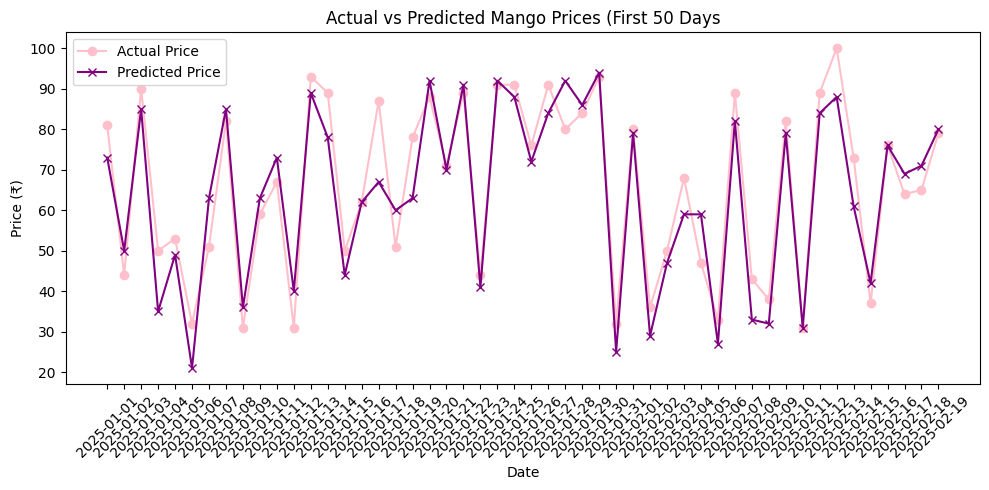

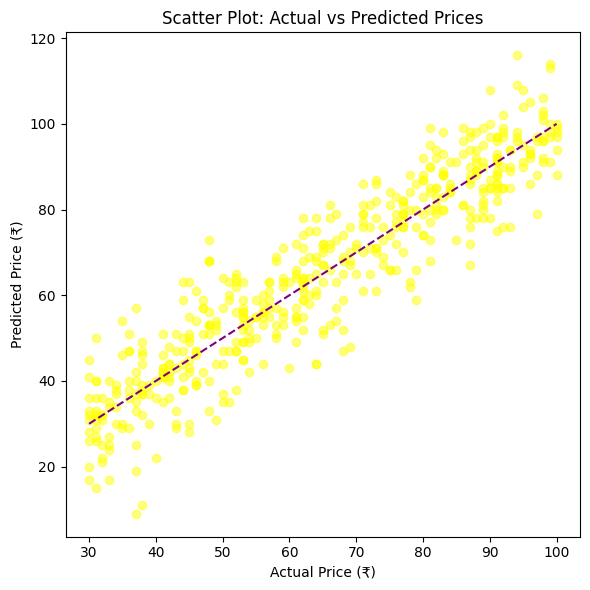

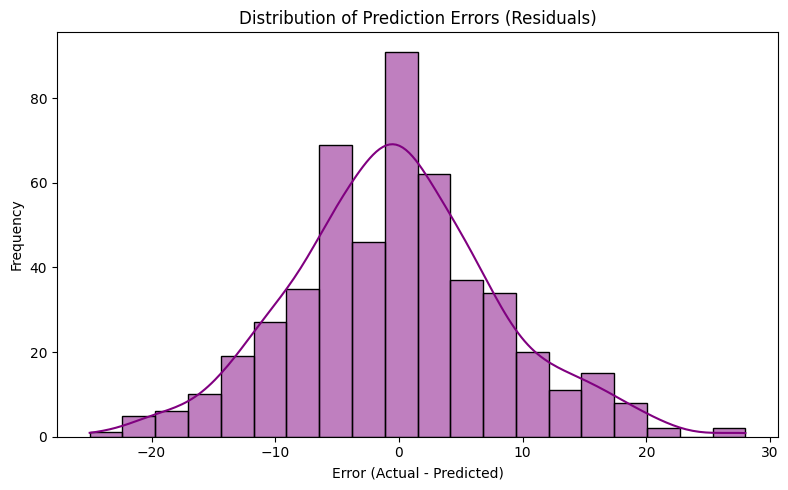

In [ ]:
# Error Matrixes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load File
df = pd.read_csv("/content/mango_sales.csv")
print(df.head())

# Actual vs Predict
actual = df["Actual_Price"]
predicted = df["Predicted_Price"]

# Error Matrices
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = math.sqrt(mse)
r2 = r2_score(actual, predicted)
print("MAE :", mae)
print("MSE :", mse)
print("RMSE :", rmse)
print("R2 :", r2)

# Total Sales Error
total_mae = mean_absolute_error(df["Total_Actual"], df["Total_Predicted"])
print("MAE for Total Sales:", total_mae)

# Visualization
# Line Plot: Actual vs Predicted (First 50 Days)
plt.figure(figsize=(10,5))
plt.plot(df["Date"][:50], df["Actual_Price"][:50], label="Actual Price", marker='o', color="pink")
plt.plot(df["Date"][:50], df["Predicted_Price"][:50], label="Predicted Price", marker='x', color="Purple")
plt.xticks(rotation=45)
plt.title("Actual vs Predicted Mango Prices (First 50 Days")
plt.xlabel("Date")
plt.ylabel("Price (₹)")
plt.legend()
plt.tight_layout()
plt.show()

# Scatter Plot: Actual vs Predicted (All Data)
plt.figure(figsize=(6,6))
plt.scatter(df["Actual_Price"], df["Predicted_Price"], color="Yellow", alpha=0.5)
plt.plot([30,100], [30,100], linestyle="--", color="Purple") # Perfect prediction line
plt.title("Scatter Plot: Actual vs Predicted Prices")
plt.xlabel("Actual Price (₹)")
plt.ylabel("Predicted Price (₹)")
plt.tight_layout()
plt.show()

# Histogram: Residuals Distribution
errors = actual - predicted
plt.figure(figsize=(8,5))
sns.histplot(errors, bins=20, kde=True, color="purple", edgecolor="black")
plt.title("Distribution of Prediction Errors (Residuals)")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

   x1         x2  x3
0  54  49.778846  41
1  57  60.528204  14
2  74  72.006069  31
3  77  72.864017  25
4  77  74.921276   3


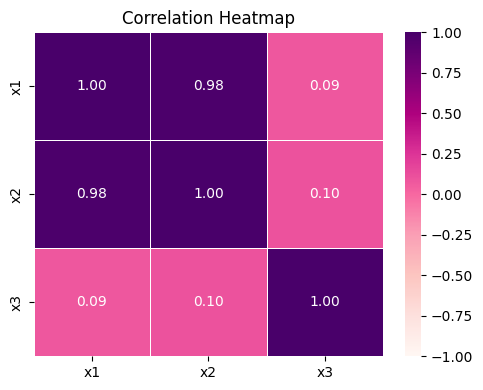


Variance Inflation Factor (VIF):
    Feature       VIIF
0        x1  27.419724
1        x2  27.509269
2        x3   1.017186
3  Constant   9.255934


In [ ]:
# Multicolinearity & VIF
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create Dataset
np.random.seed(0)
x1 = np.random.randint(10,100,50)
x2 = x1 + np.random.normal(0,5,50) # Correlated with x1
x3 = np.random.randint(1,50,50)
df = pd.DataFrame({
    "x1": x1,
    "x2": x2,
    "x3": x3,
})
print(df.head())
plt.figure(figsize=(5, 4))
sns.heatmap(
    df.corr(),
    annot=True,
    cmap="RdPu",      # 🔥 red–purple–pink gradient
    fmt=".2f",
    vmin=-1, vmax=1,
    center=0,
    linewidths=0.5,
    linecolor="white"
)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


# Variance Inflation Factor (VIF)
x = df.copy()
x["Constant"] = 1 # Adding intercept
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns
vif_data["VIIF"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
print("\nVariance Inflation Factor (VIF):")
print(vif_data)

Original Data:
     Salary
0    25000
1    28000
2    30000
3    32000
4    35000
5    34000
6    36000
7    38000
8    40000
9   150000
10  180000

Outliers detected:
     Salary
9   150000
10  180000

Data after removing outliers:
    Salary
0   25000
1   28000
2   30000
3   32000
4   35000
5   34000
6   36000
7   38000
8   40000


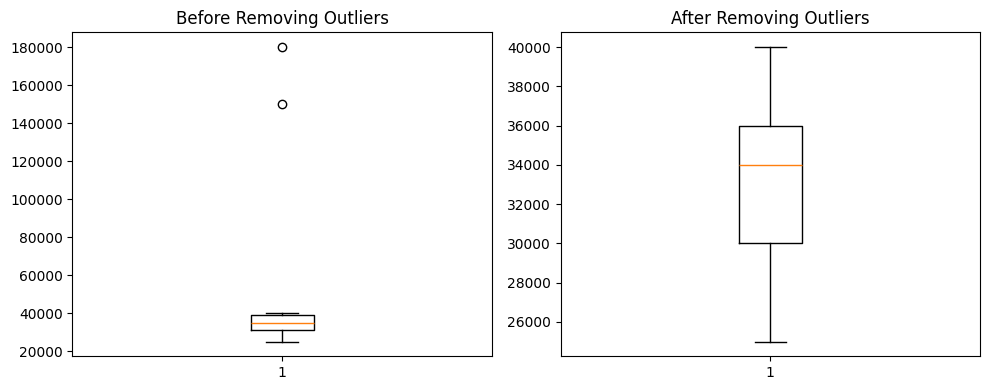

In [ ]:
# OUTLIER DETECTION & REMOVAL
# (IQR METHOD – SALARY DATASET)
import pandas as pd
import matplotlib.pyplot as plt

# Example Salary Dataset
data = {
    "Salary": [25000, 28000, 30000, 32000, 35000, 34000, 36000, 38000, 40000, 150000, 180000]   # clear outliers
}

df = pd.DataFrame(data)
print("Original Data:\n", df)

# Boxplot (Before)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(df["Salary"])
plt.title("Before Removing Outliers")

# IQR Calculation
Q1 = df["Salary"].quantile(0.25)
Q3 = df["Salary"].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Detect Outliers
outliers = df[
    (df["Salary"] < lower_limit) |
    (df["Salary"] > upper_limit)
]
print("\nOutliers detected:\n", outliers)

# Remove Outliers
df_clean = df[
    (df["Salary"] >= lower_limit) &
    (df["Salary"] <= upper_limit)
]
print("\nData after removing outliers:\n", df_clean)

# Boxplot (After)
plt.subplot(1, 2, 2)
plt.boxplot(df_clean["Salary"])
plt.title("After Removing Outliers")
plt.tight_layout()
plt.show()


In [1]:
# ===============================
# Regularization + R² & RMSE
# (Linear, Ridge, Lasso, ElasticNet)
# ===============================

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# ----------------------------
# 1. Create tiny dataset
# ----------------------------
data = {
    "TV_Ads": [10, 20, 30, 40, 50],          # in thousand $
    "Social_Media": [5, 15, 20, 25, 30],     # in thousand $
    "Sales": [100, 200, 300, 400, 500]       # in thousand $
}

df = pd.DataFrame(data)

X = df[["TV_Ads", "Social_Media"]]
y = df["Sales"]

# ----------------------------
# 2. Linear Regression
# ----------------------------
lr = LinearRegression()
lr.fit(X, y)
lr_preds = lr.predict(X)

print("Linear Regression Coefficients:", lr.coef_)

# ----------------------------
# 3. Ridge Regression
# ----------------------------
ridge = Ridge(alpha=1)
ridge.fit(X, y)
ridge_preds = ridge.predict(X)

print("\nRidge Regression Coefficients:", ridge.coef_)

# ----------------------------
# 4. Lasso Regression
# ----------------------------
# Lasso can push some coefficients to zero
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
lasso_preds = lasso.predict(X)

print("\nLasso Regression Coefficients:", lasso.coef_)

# ----------------------------
# 5. Elastic Net Regression
# ----------------------------
# Mix of L1 (Lasso) and L2 (Ridge)
enet = ElasticNet(alpha=0.1, l1_ratio=0.5)
enet.fit(X, y)
enet_preds = enet.predict(X)

print("\nElastic Net Coefficients:", enet.coef_)

# ----------------------------
# 6. Evaluation Metrics
# ----------------------------
print("\n--- Model Performance ---")

print("Linear RMSE:", np.sqrt(mean_squared_error(y, lr_preds)))
print("Linear R²:", r2_score(y, lr_preds))

print("\nRidge RMSE:", np.sqrt(mean_squared_error(y, ridge_preds)))
print("Ridge R²:", r2_score(y, ridge_preds))

print("\nLasso RMSE:", np.sqrt(mean_squared_error(y, lasso_preds)))
print("Lasso R²:", r2_score(y, lasso_preds))

print("\nElastic Net RMSE:", np.sqrt(mean_squared_error(y, enet_preds)))
print("Elastic Net R²:", r2_score(y, enet_preds))


Linear Regression Coefficients: [ 1.00000000e+01 -9.91830908e-15]

Ridge Regression Coefficients: [9.67373142 0.52765808]

Lasso Regression Coefficients: [9.9995 0.    ]

Elastic Net Coefficients: [9.93690505 0.10157182]

--- Model Performance ---
Linear RMSE: 7.30166935833559e-14
Linear R²: 1.0

Ridge RMSE: 0.7586582297490526
Ridge R²: 0.9999712218845217

Lasso RMSE: 0.007071067811875122
Lasso R²: 0.9999999975

Elastic Net RMSE: 0.14683243374491345
Elastic Net R²: 0.9999989220118201
